### Columns Description

- sku –           Random ID for the product
- national_inv –      Current inventory level for the part
- lead_time –         Transit time for product (if available)
- in_transit_qty –    Amount of product in transit from source
- forecast_3_month –  Forecast sales for the next 3 months
- forecast_6_month –  Forecast sales for the next 6 months
- forecast_9_month –  Forecast sales for the next 9 months
- sales_1_month –     Sales quantity for the prior 1 month time period
- sales_3_month –     Sales quantity for the prior 3 month time period
- sales_6_month –     Sales quantity for the prior 6 month time period
- sales_9_month –     Sales quantity for the prior 9 month time period
- min_bank –      Minimum recommend amount to stock
- potential_issue –   Source issue for part identified
- pieces_past_due –   Parts overdue from source
- perf_6_month_avg –  Source performance for prior 6 month period
- perf_12_month_avg –     Source performance for prior 12 month period
- local_bo_qty –      Amount of stock orders overdue
- deck_risk –         Part risk flag
- oe_constraint –     Part risk flag
- ppap_risk –         Part risk flag
- stop_auto_buy –     Part risk flag
- rev_stop –      Part risk flag
- went_on_backorder –     Product actually went on backorder. This is the target value.

### Importing Dependencies

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

### Read data

In [168]:
df = pd.read_csv('./data/backorder.csv', nrows=1000)

In [169]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,No,No,No,Yes,No,No
1,1043384,2,9.0,0,0,0,0,0,0,0,...,0,0.99,0.99,0,No,No,No,Yes,No,No
2,1043696,2,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
3,1043852,7,8.0,0,0,0,0,0,0,0,...,0,0.10,0.13,0,No,No,No,Yes,No,No
4,1044048,8,NaN,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No


In [170]:
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
995,1112475,19,12.0,0,24,40,56,5,14,47,...,0,0.62,0.73,0,No,No,No,Yes,No,No
996,1112476,153,6.0,15,30,88,127,15,61,109,...,0,0.79,0.66,0,No,No,No,Yes,No,No
997,1112477,11,8.0,0,0,0,0,1,3,5,...,0,0.77,0.74,0,No,No,No,Yes,No,No
998,1112478,137,8.0,49,250,453,653,83,294,548,...,0,0.95,0.97,0,No,No,No,Yes,No,No
999,1112479,11,NaN,11,0,0,0,3,8,15,...,0,-99.00,-99.00,0,No,No,No,No,No,No


In [171]:
columns = df.columns
columns, len(columns)

(Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
        'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
        'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
        'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
        'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
        'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
       dtype='object'),
 23)

Insights: We have up to 23 columns in our data

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                1000 non-null   int64  
 1   national_inv       1000 non-null   int64  
 2   lead_time          858 non-null    float64
 3   in_transit_qty     1000 non-null   int64  
 4   forecast_3_month   1000 non-null   int64  
 5   forecast_6_month   1000 non-null   int64  
 6   forecast_9_month   1000 non-null   int64  
 7   sales_1_month      1000 non-null   int64  
 8   sales_3_month      1000 non-null   int64  
 9   sales_6_month      1000 non-null   int64  
 10  sales_9_month      1000 non-null   int64  
 11  min_bank           1000 non-null   int64  
 12  potential_issue    1000 non-null   object 
 13  pieces_past_due    1000 non-null   int64  
 14  perf_6_month_avg   1000 non-null   float64
 15  perf_12_month_avg  1000 non-null   float64
 16  local_bo_qty       1000 n

Insights: More of our data values are numbers and 8 of them string

In [173]:
df.shape

(1000, 23)

Insights: Wow, pretty large one here

### Exploratory Data Analysis

In [174]:
## Let's drop the id column
df.drop(columns='sku', axis=1, inplace=True)

In [175]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,NaN,0,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,No,No,No,Yes,No,No
1,2,9.0,0,0,0,0,0,0,0,0,...,0,0.99,0.99,0,No,No,No,Yes,No,No
2,2,NaN,0,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
3,7,8.0,0,0,0,0,0,0,0,0,...,0,0.10,0.13,0,No,No,No,Yes,No,No
4,8,NaN,0,0,0,0,0,0,0,4,...,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No


In [176]:
# for col in df.columns:
#     sns.histplot(df[col])
#     plt.show()

In [177]:
# Checking for duplicates and dropping them
df[df.duplicated()].head(10)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
21,18,NaN,0,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
32,2,NaN,0,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
41,10,NaN,0,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,No,No,No,Yes,No,No
47,0,NaN,0,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,No,No,No,Yes,No,No
53,2,NaN,0,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
66,26,NaN,0,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
86,0,NaN,0,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,No,No,No,Yes,No,No
89,0,NaN,0,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,No,No,No,Yes,No,No
91,10,NaN,0,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,No,No,No,Yes,No,No
107,0,NaN,0,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,No,No,No,Yes,No,No


In [178]:
df.duplicated().sum()

38

In [179]:
df.drop_duplicates(inplace=True)

Insights: We had 667552 out of our 1687861 rows, dropping them we now have 1020309 rows

In [180]:
num_col = df.select_dtypes(include=[int, float]).columns
num_col

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

In [181]:
cat_col = df.select_dtypes(exclude=[int, float]).columns
cat_col

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [182]:
# Let's check for missing values
df.isna().sum()

national_inv           0
lead_time            125
in_transit_qty         0
forecast_3_month       0
forecast_6_month       0
forecast_9_month       0
sales_1_month          0
sales_3_month          0
sales_6_month          0
sales_9_month          0
min_bank               0
potential_issue        0
pieces_past_due        0
perf_6_month_avg       0
perf_12_month_avg      0
local_bo_qty           0
deck_risk              0
oe_constraint          0
ppap_risk              0
stop_auto_buy          0
rev_stop               0
went_on_backorder      0
dtype: int64

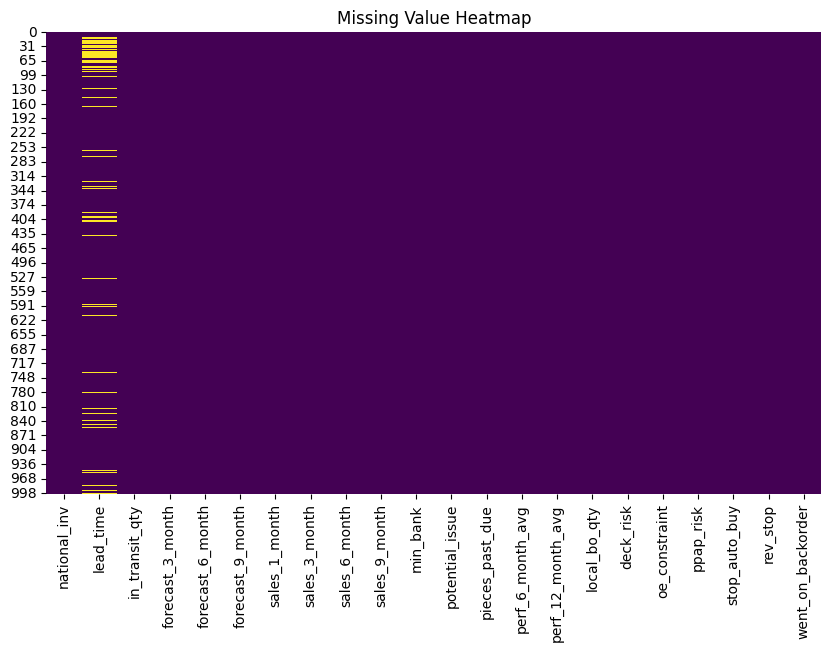

In [183]:
# Creating a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Value Heatmap')
plt.show()

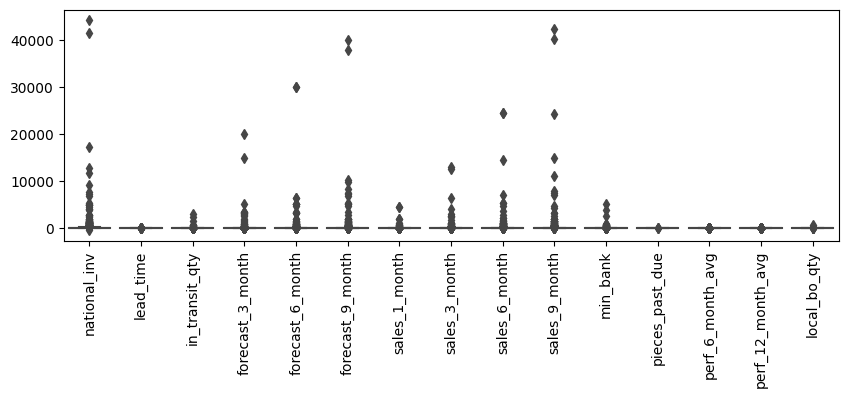

In [184]:
# Let's check for outliers
plt.figure(figsize=(10,3))
sns.boxplot(df)
plt.xticks(rotation='vertical')
plt.show()

In [185]:
# Handling Missing values for the "lead_time" column
df['lead_time'].fillna(df['lead_time'].mean(), inplace=True)

Insights: We made use of mean to replace the missing values because the column "lead_time" seems to be without or rather less outliers

In [186]:
df.isna().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [187]:
# Checking for imbalance
df['went_on_backorder'].value_counts()

went_on_backorder
No     956
Yes      6
Name: count, dtype: int64

In [188]:
# Correlation
num_cols = df.select_dtypes('int', 'float').columns
num_cols

Index(['national_inv', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'local_bo_qty'],
      dtype='object')

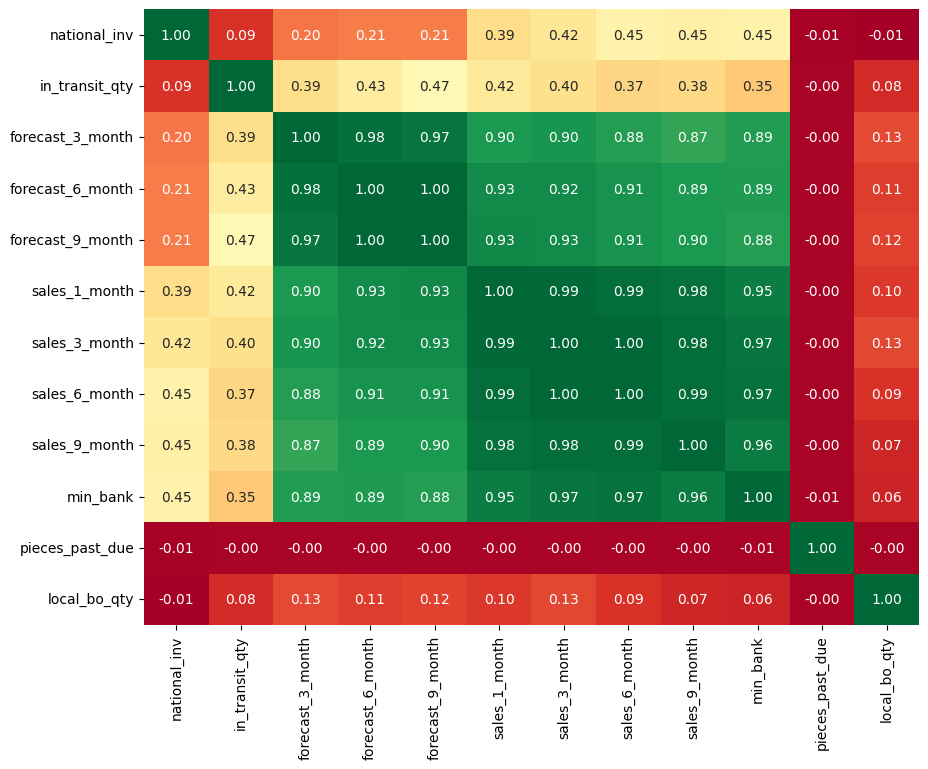

In [189]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='RdYlGn', fmt='.2f', cbar=False)
plt.show()

In [190]:
# Dropping highly correlated features
def correlation(data, threshold):
    col_corr = set() # Set of all the names of the correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # We are interested in absolute coeff value
                colname = corr_matrix.columns[i] # Getting the name of the column
                col_corr.add(colname)
    return col_corr            

In [191]:
len(columns)

23

In [192]:
df.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [193]:
highly_corr = correlation(df[num_cols], 0.8)
highly_corr

{'forecast_6_month',
 'forecast_9_month',
 'min_bank',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month'}

In [196]:
for i in correlation(df[num_cols], 0.8):
    df.drop(columns=[i], axis=1, inplace=True)

In [197]:
len(df.columns)

15

In [198]:
df.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

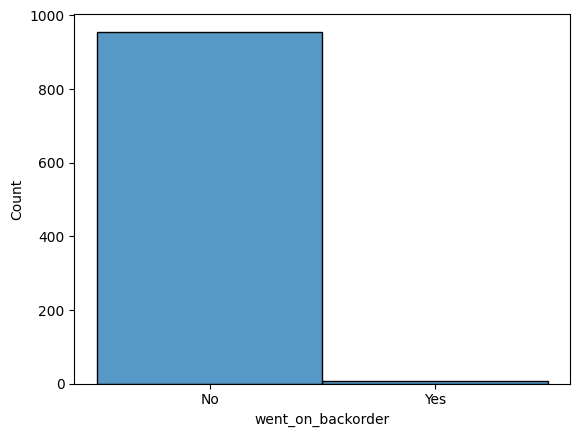

In [199]:
sns.histplot(df['went_on_backorder'])
plt.show()

Insight: The dataset is highly imbalanced

In [200]:
#### Performing Feature Encoding to be able use SMOTETomek to handle our imbalanced data

cat_col = df.select_dtypes(exclude=[int, float]).columns
cat_col

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [201]:
label_enc = LabelEncoder()
for col in cat_col:
    df[col] = label_enc.fit_transform(df[col])

In [202]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,7.892473,0,0,0,0,-99.00,-99.00,0,0,0,0,1,0,0
1,2,9.000000,0,0,0,0,0.99,0.99,0,0,0,0,1,0,0
2,2,7.892473,0,0,0,0,-99.00,-99.00,0,1,0,0,1,0,0
3,7,8.000000,0,0,0,0,0.10,0.13,0,0,0,0,1,0,0
4,8,7.892473,0,0,0,0,-99.00,-99.00,0,1,0,0,1,0,0


In [203]:
# Handling the imbalanced nature using SMOTE
smt = SMOTETomek(sampling_strategy="auto")

In [204]:
X = df.drop(columns=['went_on_backorder'], axis=1)
y = df['went_on_backorder']

In [205]:
X_new, y_new = smt.fit_resample(X, y)

In [206]:
# Convert the upsampled data back to a DataFrame
df = pd.DataFrame(X_new, columns=X.columns)
df['went_on_backorder'] = y_new

In [207]:
df['went_on_backorder'].value_counts()

went_on_backorder
0    952
1    952
Name: count, dtype: int64

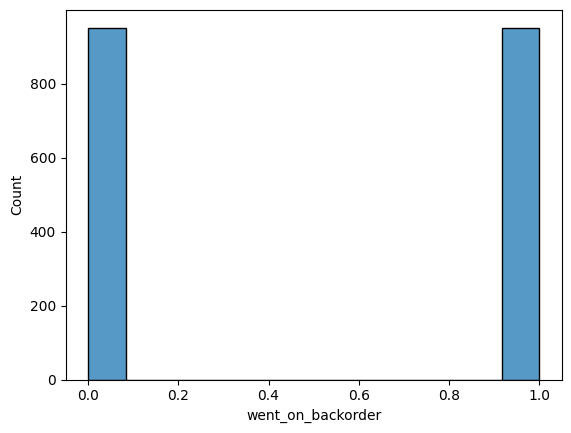

In [208]:
sns.histplot(df['went_on_backorder'])
plt.show()

In [209]:
def handle_outliers(df, col):
    Q1 = np.percentile(df[col], 25, method='midpoint')
    Q3 = np.percentile(df[col], 75, method='midpoint')
    IQR = Q3 - Q1

    upper = Q3 +1.5*IQR
    lower = Q1 - 1.5*IQR

    df.loc[df[col] > upper, col] = df[col].median()

In [210]:
for col in df.columns:
    handle_outliers(df, col)

In [211]:
## Feature Scaling
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['went_on_backorder']))

In [212]:
X = pd.DataFrame(scaled_data, columns=df.columns[:-1])

In [213]:
X

,national_inv,lead_time,in_transit_qty,forecast_3_month,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,-0.28,-0.107527,0.0,-0.146179,0.0,0.0,-114.678161,-125.306763,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.20,1.000000,0.0,-0.146179,0.0,0.0,0.252874,0.267874,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.20,-0.107527,0.0,-0.146179,0.0,0.0,-114.678161,-125.306763,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.000000,0.0,-0.146179,0.0,0.0,-0.770115,-0.812176,0.0,0.0,0.0,0.0,0.0,0.0
4,0.04,-0.107527,0.0,-0.146179,0.0,0.0,-114.678161,-125.306763,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,-15.00,0.000000,0.0,0.000000,0.0,0.0,-0.264525,-0.117354,0.0,0.0,0.0,0.0,0.0,0.0
1900,-0.28,0.000000,1.0,-0.006645,0.0,0.0,0.162807,0.114100,0.0,0.0,0.0,0.0,0.0,0.0
1901,-7.24,0.000000,0.0,0.000000,0.0,0.0,0.042396,0.108264,0.0,0.0,0.0,0.0,0.0,0.0
1902,0.28,0.000000,0.0,13.415282,0.0,0.0,0.250149,0.212461,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
y = df['went_on_backorder'].astype('int64')
y

0       0
1       0
2       0
3       0
4       0
       ..
1899    1
1900    1
1901    1
1902    1
1903    1
Name: went_on_backorder, Length: 1904, dtype: int64

In [215]:
df = pd.concat([X,y], axis=1)
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,-0.28,-0.107527,0.0,-0.146179,0.0,0.0,-114.678161,-125.306763,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.20,1.000000,0.0,-0.146179,0.0,0.0,0.252874,0.267874,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.20,-0.107527,0.0,-0.146179,0.0,0.0,-114.678161,-125.306763,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.00,0.000000,0.0,-0.146179,0.0,0.0,-0.770115,-0.812176,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.04,-0.107527,0.0,-0.146179,0.0,0.0,-114.678161,-125.306763,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,-15.00,0.000000,0.0,0.000000,0.0,0.0,-0.264525,-0.117354,0.0,0.0,0.0,0.0,0.0,0.0,1
1900,-0.28,0.000000,1.0,-0.006645,0.0,0.0,0.162807,0.114100,0.0,0.0,0.0,0.0,0.0,0.0,1
1901,-7.24,0.000000,0.0,0.000000,0.0,0.0,0.042396,0.108264,0.0,0.0,0.0,0.0,0.0,0.0,1
1902,0.28,0.000000,0.0,13.415282,0.0,0.0,0.250149,0.212461,0.0,0.0,0.0,0.0,0.0,0.0,1


In [216]:
df.to_csv("./data/cleaned_data.csv", index=False)